# Part 3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1) **K-Nearest Neighbours**

2) **Logistic Regression**

<br>

## Imports

In [27]:
# EDA and Feature Engineering
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.neighbors import KNeighborsClassifier #KNN

# Machine Learning Model Evaluation
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

<br>

## Load Data
This will look different depending on the layout of your data, In most cases you will perform some sort of a train_test_split. Which is the process of splitting your data into training and testing sets, each with an X and y component. 

In the case of the Titanic data, it was given to us pre-split into files named test.csv and train.csv
We joined the dataframes together in order to perform some data analysis, cleaning and eventually some feature engineering. 

In oredr to properly join the 2 datasets, we added a "dummy" ```Survival``` column to ```test.csv```, we also made sure to take note where we concatted, so that we could re-split the data afterwards.

<hr>

**Some Considerations**

<hr>

### Training / Test Split

In [5]:
data = pd.read_csv('../data/clean/titanic_abt.csv')

### Testing Data

In [30]:
features = data.drop(['Survived'], axis=1)
target = data['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, train_size=0.75, random_state=22)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<br>

### Check Dimensions

In [32]:
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (668, 31) y_train: (668,)
X_test: (223, 31) y_test: (223,)


In [37]:
# So we can print entire matrices without truncating
import sys
np.set_printoptions(threshold=sys.maxsize)

In [39]:
# print(X_test)

<br>
<hr>

## Lesson: K-Nearest Neighbours(KNN)

### 1. Instantiate the Model

In [40]:
model = KNeighborsClassifier(n_neighbors=3)

### 2. Fit Model to "Training" Data: ```X_train``` and ```y_train```

In [41]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### 3. Make Predictions on ```X_test```

In [42]:
predictions = model.predict(X_test)

### 4. Evaluate Model Accuracy against ```y_test```

In [43]:
print('The accuracy of the KNN is', metrics.accuracy_score(predictions,y_test))

The accuracy of the KNN is 0.7982062780269058


### 5. Model Tuning
The accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.

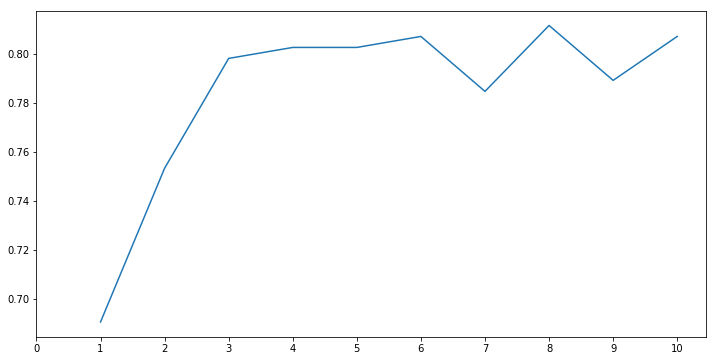

In [45]:
neighbors = list(range(1,11))
accuracy = pd.Series()


for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors = neighbor) 
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy.append(pd.Series(metrics.accuracy_score(prediction, y_test)))


# Build Plot of num_neighbor vs accuracy    
plt.plot(neighbors, accuracy)

# Plot styles
ticks = [0,1,2,3,4,5,6,7,8,9,10]
plt.xticks(ticks)
fig = plt.gcf()
fig.set_size_inches(12,6)


plt.show()

In [53]:
print('Accuracies for different values of neighbor are:')
for neighbor, accur_val in enumerate(accuracy.values):
    print(str(neighbor + 1) + ":", accur_val)
print()
print('Max Accuracy ',accuracy.values.max())

Accuracies for different values of neighbor are:
1: 0.6905829596412556
2: 0.7533632286995515
3: 0.7982062780269058
4: 0.8026905829596412
5: 0.8026905829596412
6: 0.8071748878923767
7: 0.7847533632286996
8: 0.8116591928251121
9: 0.7892376681614349
10: 0.8071748878923767

Max Accuracy  0.8116591928251121


<br>
<hr>

## Exercise: Logistic Regression

In [ ]:
# instantiate the model

# fit the model to X_train and y_train

# Make predictions on X_test

# Measure accuracy by comparing predictions to y_test

The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance**.

To overcome this and get a generalized model,we use **Cross Validation**.
We will look at the details, later in the course (Week 3 or so)!

<br>
<hr>

## Cross-Validation Primer

In [ ]:
from sklearn.model_selection import cross_val_predict

### Prepare Data

In [ ]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train, y_test["Survived"]])

### Instantiate Model

In [ ]:
model = LogisticRegression(solver="lbfgs")

### Make Predictions using Cross-Validation

#### This process will fit and predict in one step.

In [ ]:
y_pred = cross_val_predict(model, X, y, cv = 10)

### Evaluate Model Accuracy

In [ ]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='2.0f')
print('The accuracy of the Cross-Validated Logistic Regression is:', metrics.accuracy_score(y_pred, y))

<br>
<hr>

## Can you repeat the steps above using a KNN model?